## NAME: Souri Rishik Volety
## Reg No: 230968004

In [1]:
import os

In [2]:
base_dir = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
 
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int', 
    shuffle=True,
    seed=123
)

2025-08-23 23:21:32.051781: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-23 23:21:32.066234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755971492.075525   43306 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755971492.078300   43306 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 23:21:32.094463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 2000 files belonging to 2 classes.


I0000 00:00:1755971493.888668   43306 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9660 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int', 
    shuffle=True,
    seed=123
)

Found 1000 files belonging to 2 classes.


In [6]:
import tensorflow as tf

In [7]:
lenet = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.RandomRotation(factor=[-0.25, 0.25]),
    tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [8]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 224, 224, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 110, 110, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 53, 53, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     5,393,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,406,613 (20.62 MB)

 Trainable params: 5,406,606 (20.62 MB)

 Non-trainable params: 7 (32.00 B)

In [9]:
lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = lenet.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20


I0000 00:00:1755971496.614571   43371 cuda_dnn.cc:529] Loaded cuDNN version 90101


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5300 - loss: 42.8675 - val_accuracy: 0.5180 - val_loss: 0.6893
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5270 - loss: 0.6929 - val_accuracy: 0.5200 - val_loss: 0.6890
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5285 - loss: 0.6909 - val_accuracy: 0.5230 - val_loss: 0.6921
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5485 - loss: 0.6871 - val_accuracy: 0.5350 - val_loss: 0.6905
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5455 - loss: 0.6946 - val_accuracy: 0.5400 - val_loss: 0.6876
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5865 - loss: 0.6743 - val_accuracy: 0.5710 - val_loss: 0.6819
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5760 - loss: 0.6798 - val_accuracy: 0.5570 - val_loss: 0.6818
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5900 - loss: 0.6833 - val_accuracy: 0.5530 - val_loss: 0

In [11]:
import matplotlib.pyplot as plt

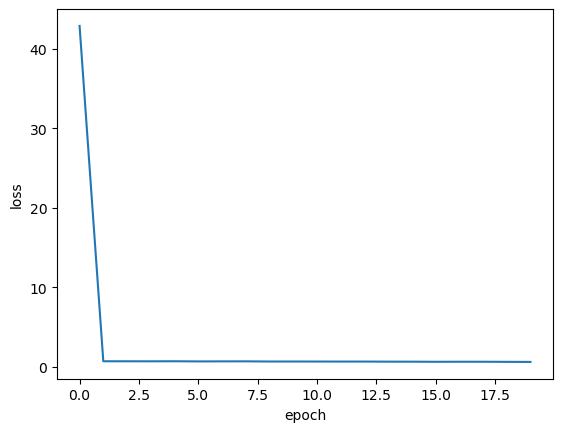

In [12]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

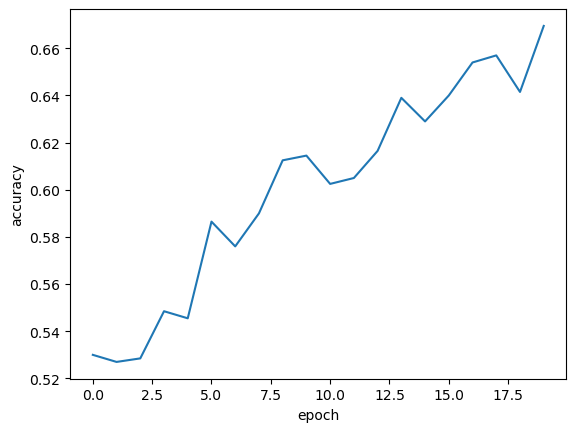

In [13]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

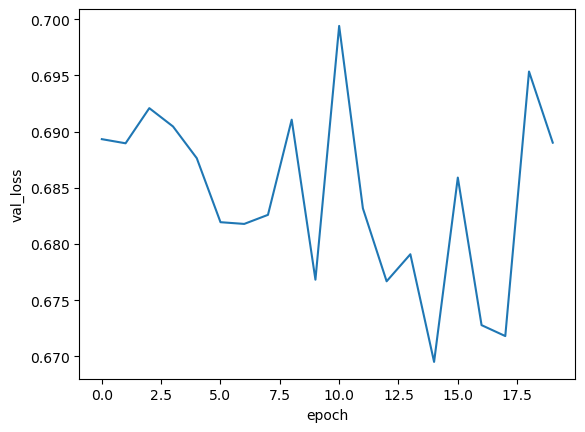

In [14]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

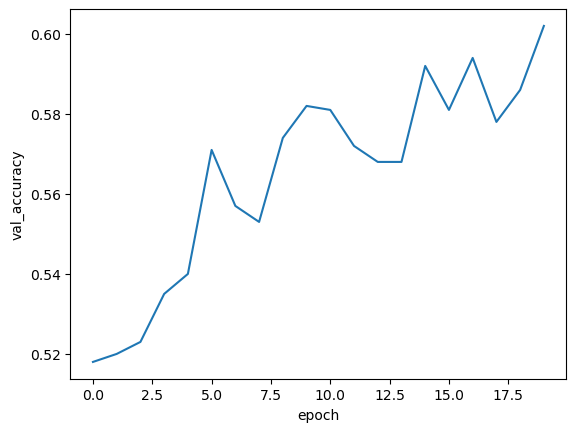

In [15]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [16]:
alexnet = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.RandomRotation(factor=[-0.25, 0.25]),
    tf.keras.layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(384, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(384, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [17]:
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 224, 224, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,289,545 (222.36 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 7 (32.00 B)

In [18]:
alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
history = alexnet.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.5070 - loss: 48.4167 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - acc: 0.4845 - loss: 0.6934 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.4765 - loss: 0.6934 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.4840 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.4810 - loss: 0.6934 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.4990 - loss: 0.6932 - val_acc: 0.5020 - val_loss: 0.6931
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - acc: 0.4955 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.4665 - loss: 0.6935 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - acc: 0.499

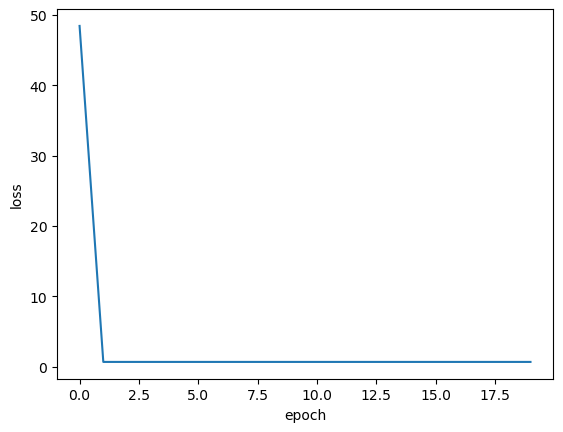

In [20]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

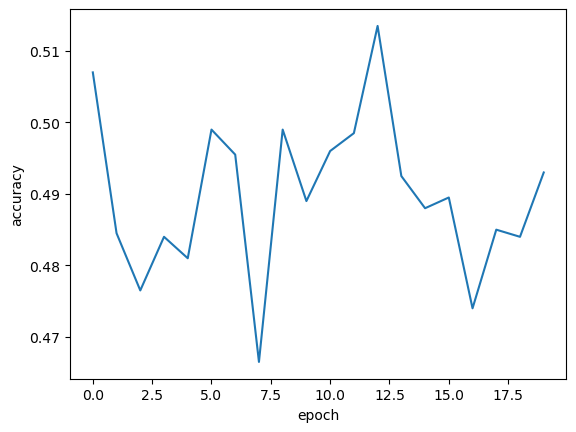

In [21]:
plt.plot(history.history['acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

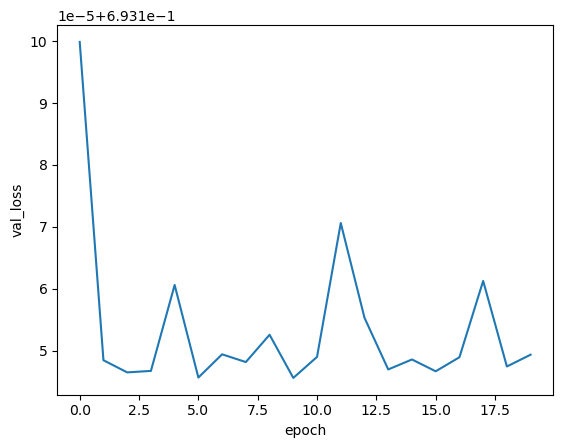

In [22]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

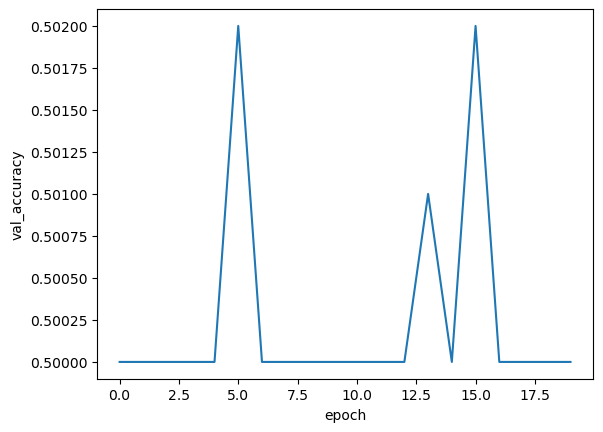

In [23]:
plt.plot(history.history['val_acc'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [24]:
train_dir = "horse_2_zebra/train"
validation_dir = "horse_2_zebra/validation"

In [25]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123
)

Found 2401 files belonging to 2 classes.


In [26]:
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123
)

Found 260 files belonging to 2 classes.


In [27]:
history = lenet.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6493 - loss: 0.5999 - val_accuracy: 0.7808 - val_loss: 0.4666
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7659 - loss: 0.4838 - val_accuracy: 0.7654 - val_loss: 0.4576
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7984 - loss: 0.4418 - val_accuracy: 0.8385 - val_loss: 0.3440
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8097 - loss: 0.4164 - val_accuracy: 0.8308 - val_loss: 0.3541
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8484 - loss: 0.3473 - val_accuracy: 0.8654 - val_loss: 0.3173
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8609 - loss: 0.3256 - val_accuracy: 0.8923 - val_loss: 0.2787
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8646 - loss: 0.3151 - val_accuracy: 0.8885 - val_loss: 0.3213
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8755 - loss: 0.2933 - val_accuracy: 0.9154 - v

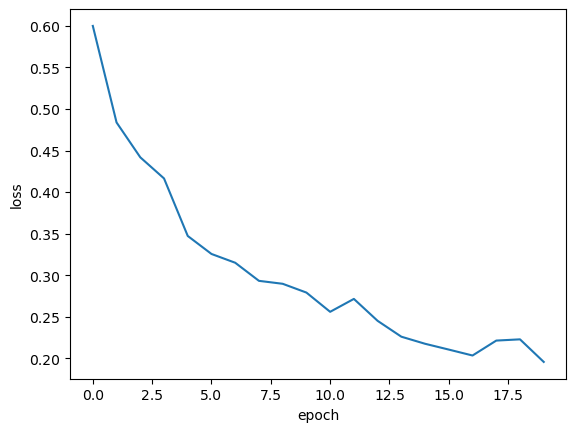

In [28]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

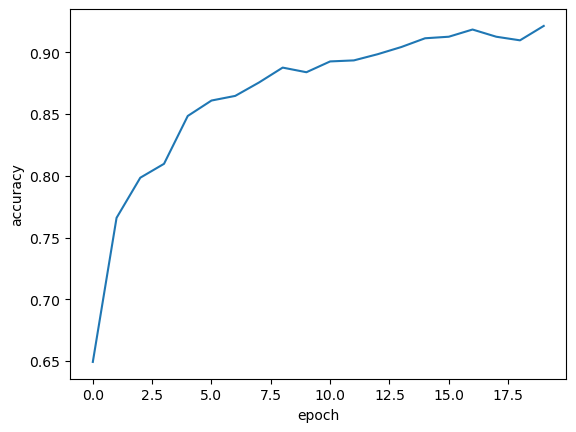

In [29]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

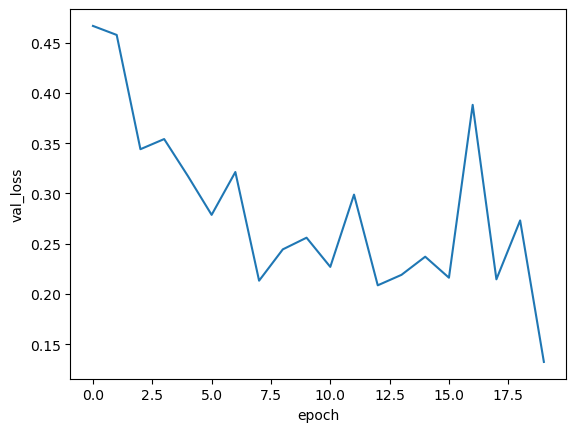

In [30]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

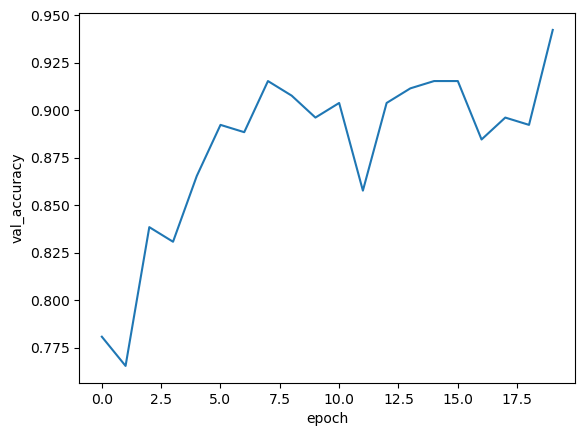

In [31]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [32]:
history = alexnet.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - acc: 0.5485 - loss: 0.6892 - val_acc: 0.5385 - val_loss: 0.6907
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - acc: 0.5556 - loss: 0.6879 - val_acc: 0.5385 - val_loss: 0.6914
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - acc: 0.5556 - loss: 0.6877 - val_acc: 0.5385 - val_loss: 0.6911
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - acc: 0.5477 - loss: 0.7010 - val_acc: 0.5385 - val_loss: 2.9657
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - acc: 0.5527 - loss: 0.7066 - val_acc: 0.5385 - val_loss: 0.6916
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - acc: 0.5556 - loss: 0.6879 - val_acc: 0.5385 - val_loss: 0.6912
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - acc: 0.5556 - loss: 0.6876 - val_acc: 0.5385 - val_loss: 0.6906
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - acc: 0.5556 - loss: 0.6879 - val_acc: 0.5385 - val_loss: 0.6912
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - acc: 0.5560

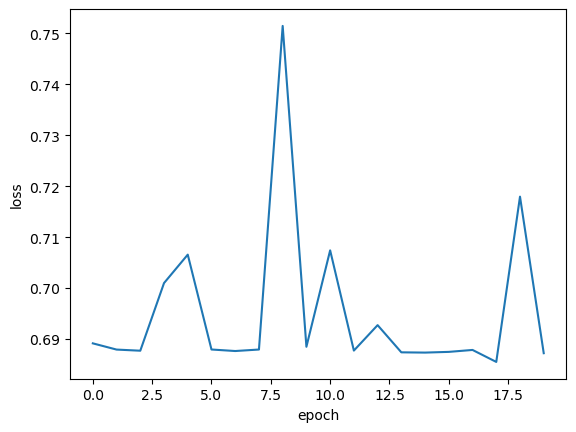

In [33]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

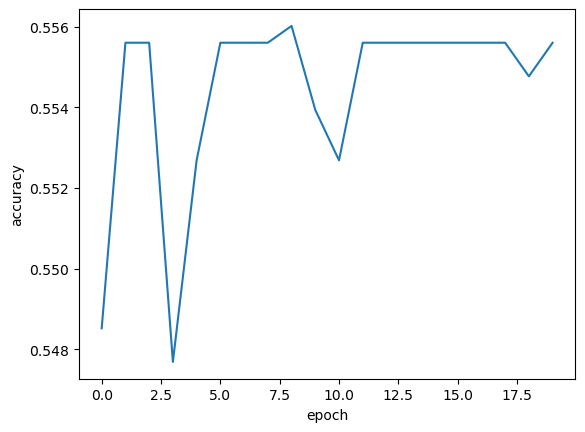

In [34]:
plt.plot(history.history['acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

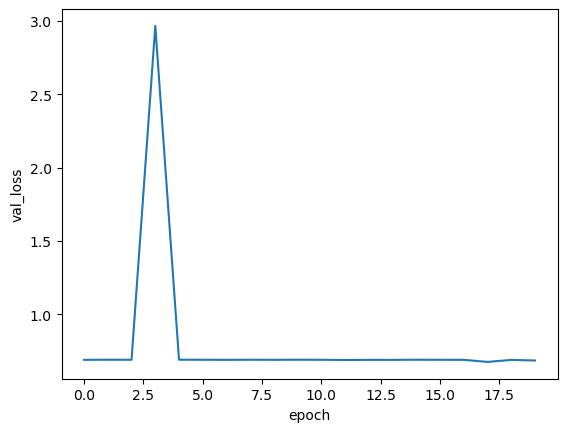

In [35]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

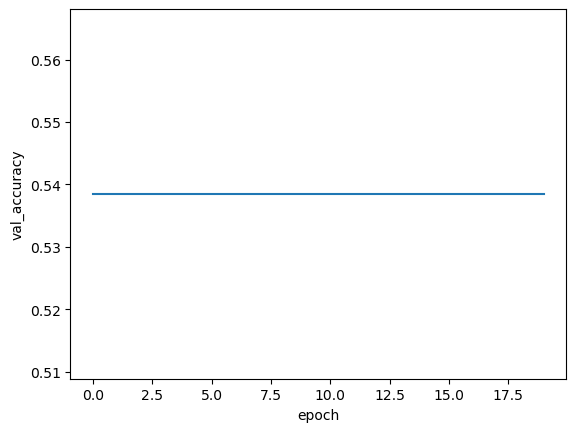

In [36]:
plt.plot(history.history['val_acc'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()